In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv(r"E:\Ganesh\Strattek_Dump\GS\Personal\Family\Ganesh\Learning\IIITH\Class Material\Data Analytics\Real Estate Analysis\assignmnet-1_dataset.zip")

# Data Preprocessing

## Data Exploration & Cleaning

### Checking the Data Info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Columns: 145 entries, ID to Pantry Type
dtypes: float64(12), int64(93), object(40)
memory usage: 14.0+ MB


In [25]:
df.describe()

,ID,Units Available,Price,Maintenance Charges,Booking Amount,Covered Area,sqft Price,Carpet Area,Bathroom,bedroom,...,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Land Area / Covered Area,Land Area Unit
count,12685.000000,6135.000000,1.260100e+04,6.283000e+03,7.701000e+03,11374.000000,1.148000e+04,10133.000000,12616.000000,12685.000000,...,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,84.000000,86.000000
mean,6343.000000,7.751589,2.640261e+07,9.076812e+03,8.101702e+05,1037.746439,2.243507e+04,819.201224,2.143389,1.987150,...,0.540402,0.540323,0.536539,0.536855,0.537958,0.540166,0.544028,0.536382,7248.869048,12847.825581
std,3661.988417,26.335448,3.653648e+08,2.399983e+05,2.997549e+06,727.327389,3.187654e+05,585.037811,0.926965,0.943404,...,0.498385,0.498391,0.498683,0.498660,0.498577,0.498404,0.498077,0.498694,18240.893916,10.643078
min,1.000000,0.000000,1.000000e+05,0.000000e+00,0.000000e+00,10.000000,0.000000e+00,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12800.000000
25%,3172.000000,0.000000,7.000000e+06,1.000000e+01,1.000000e+05,605.500000,1.000000e+04,468.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,792.500000,12850.000000
50%,6343.000000,1.000000,1.350000e+07,2.500000e+03,5.000000e+05,850.000000,1.634850e+04,671.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,12850.000000
75%,9514.000000,5.000000,2.550000e+07,6.000000e+03,9.000000e+05,1200.000000,2.461500e+04,950.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3392.500000,12850.000000
max,12685.000000,750.000000,4.080000e+10,1.768000e+07,1.050000e+08,15006.000000,3.400000e+07,20870.000000,10.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100000.000000,12853.000000


In [33]:
df.dtypes

ID                            int64
Possession Status            object
Availability Starts From     object
Floor No                     object
Commercial                   object
                             ...   
Possession By                object
NRI Pref                     object
Land Area / Covered Area    float64
Land Area Unit              float64
Pantry Type                  object
Length: 145, dtype: object

### Checking for duplicate columns - Attempt to remove the noice and inconsistent data

In [36]:
# Display all column names
print(df.columns.tolist())

['ID', 'Possession Status', 'Availability Starts From', 'Floor No', 'Commercial', 'Developer', 'Approved Authority Name', 'Units Available', 'Price', 'Price (English)', 'Flooring Type', 'Electricity Status', 'Maintenance Type', 'Maintenance Charges', 'Booking Amount', 'Landmark', 'Covered Area', 'Project Name', 'sqft Price ', 'Carpet Area', 'Area Name', 'Property Uniqueness', 'Unit of Carpet Area', 'Society', 'Ownership Type', 'furnished Type', 'Bathroom', 'Parking', 'Facing', 'Amenities Facing', 'Transaction Type', 'Floor Data', 'Type of Property', 'City', 'bedroom', 'Data Referred From', 'floors', 'Water Status', 'Luxury Flat', 'Covered Area.1', 'Carpet Area Unit', 'isPrimeLocationProperty', 'Tenants Preference', 'Location', 'Property', 'covArea Unit', 'isLuxuryServiceProvided', 'Property Lifespan', 'balconies', 'Rera', 'Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking.1', 'Security', 'Water Storage', 'Private Terrace/Garde

In [38]:
# Find columns with '.1' in their names
columns_with_dot1 = [col for col in df.columns if '.1' in col]

print("Columns with '.1' in their names:", columns_with_dot1)

Columns with '.1' in their names: ['Covered Area.1', 'Parking.1']


In [40]:
# Get column names
columns = df.columns

# Convert column names to lowercase
lowercase_columns = [col.lower() for col in columns]

# Create a dictionary to store original column names
case_sensitive_columns = {}

# Find case-insensitive duplicates
for original, lower in zip(columns, lowercase_columns):
    if lower in case_sensitive_columns:
        case_sensitive_columns[lower].append(original)
    else:
        case_sensitive_columns[lower] = [original]

# Filter out columns with case-insensitive duplicates
case_sensitive_duplicates = {k: v for k, v in case_sensitive_columns.items() if len(v) > 1}

# Print case-sensitive columns
print("Case-sensitive column names:")
for key, values in case_sensitive_duplicates.items():
    print(f"Base name '{key}' corresponds to columns: {values}")

Case-sensitive column names:
Base name 'kids play area' corresponds to columns: ['Kids play area', 'Kids Play Area']


In [42]:
# Define the columns to compare
columns_to_compare = [
    ('Covered Area', 'Covered Area.1'),
    ('Parking', 'Parking.1'),
    ('Kids Play Area', 'Kids play area')
]

# Compare top 12685 rows of specified columns
def compare_top_rows(df, col1, col2, n=12685):
    if col1 in df.columns and col2 in df.columns:
        # Select top n rows
        top_rows_col1 = df[col1].head(n)
        top_rows_col2 = df[col2].head(n)
        
        # Check if the values are the same
        identical = top_rows_col1.equals(top_rows_col2)
        
        if identical:
            print(f"The top {n} rows of '{col1}' and '{col2}' have identical values.")
        else:
            print(f"The top {n} rows of '{col1}' and '{col2}' do not have identical values.")
            # Display the differences
            diff = pd.concat([top_rows_col1, top_rows_col2], axis=1, keys=[col1, col2])
            print("Differences in top rows:")
            print(diff[diff[col1] != diff[col2]])
    else:
        print(f"One or both columns '{col1}' and '{col2}' do not exist in the DataFrame.")

# Compare top rows for each pair of columns
for col1, col2 in columns_to_compare:
    compare_top_rows(df, col1, col2)

The top 12685 rows of 'Covered Area' and 'Covered Area.1' do not have identical values.
Differences in top rows:
       Covered Area Covered Area.1
0             635.0            635
1             579.0            579
2             850.0            850
3            1050.0           1050
4             561.0            561
...             ...            ...
12675           NaN            NaN
12676           NaN            NaN
12677           NaN            NaN
12680           NaN            NaN
12683           NaN            NaN

[8636 rows x 2 columns]
The top 12685 rows of 'Parking' and 'Parking.1' do not have identical values.
Differences in top rows:
                 Parking  Parking.1
0              1 Covered          1
1              1 Covered          1
2                 1 Open          1
3      1 Covered, 1 Open          1
4                    NaN          1
...                  ...        ...
12680          1 Covered          0
12681          1 Covered          1
12682          

#### Here we can notice that the values of Covered Area and Covered Area.1 columns are identical hence checking for data type.

In [55]:
DATA_TYPE_CA_CA1 = df[["Covered Area", "Covered Area.1"]].dtypes
print(DATA_TYPE_CA_CA1)

Covered Area      float64
Covered Area.1     object
dtype: object


### Converting the data type from object to float for Covered Area.1 Column

In [65]:
# Display the data type of the column before conversion
print("Data Type before conversion:")
print(df['Covered Area.1'].dtype)

# Convert 'Covered Area.1' to numeric, forcing errors to NaN
df['Covered Area.1'] = pd.to_numeric(df['Covered Area.1'], downcast='integer', errors='coerce')

# Display the data type of the column after conversion
print("\nData Type after conversion:")
print(df['Covered Area.1'].dtype)

Data Type before conversion:
float64

Data Type after conversion:
float64


In [67]:
# Check the data types for specific columns
data_types_specific = df[['Covered Area', 'Covered Area.1']].dtypes

# Print data types for the specific columns
print("Data Types for 'Covered Area' and 'Covered Area.1':")
print(data_types_specific)

Data Types for 'Covered Area' and 'Covered Area.1':
Covered Area      float64
Covered Area.1    float64
dtype: object


## Checking for matching values in duplicate columns

In [73]:
# Ensure the relevant columns are in float format
df['Covered Area'] = df['Covered Area'].astype(float)
df['Covered Area.1'] = df['Covered Area.1'].astype(float)

# Create a column to indicate if the values match
df['Match'] = df['Covered Area'] == df['Covered Area.1']

# Display the first few rows to check the new column
print(df[['Covered Area', 'Covered Area.1', 'Match']].head(12685))

       Covered Area  Covered Area.1  Match
0             635.0           635.0   True
1             579.0           579.0   True
2             850.0           850.0   True
3            1050.0          1050.0   True
4             561.0           561.0   True
...             ...             ...    ...
12680           NaN             NaN  False
12681        1376.0          1376.0   True
12682         970.0           970.0   True
12683           NaN             NaN  False
12684         685.0           685.0   True

[12685 rows x 3 columns]


### Dropping the identical column - 'Covered Area.1'

In [92]:
# Remove unnecessary columns
df = df.drop(columns=['Covered Area.1'])

### Checking for missing values

In [77]:
# Check for missing values
print(df.isnull().sum())

ID                              0
Possession Status              78
Availability Starts From     9602
Floor No                      858
Commercial                      0
                            ...  
NRI Pref                    10668
Land Area / Covered Area    12601
Land Area Unit              12599
Pantry Type                 12620
Match                           0
Length: 146, dtype: int64


### Missing values treatment

In [83]:
# Handle missing values
# For numerical columns, use mean or median
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [85]:
# For categorical columns, use mode
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [89]:
# Convert 'Availability Starts From' to a numeric format for easier processing
df['Availability Starts From'] = pd.to_datetime(df['Availability Starts From'], format='%b \'%y', errors='coerce')
df['Availability Starts From'] = df['Availability Starts From'].astype(int, errors='ignore')

# Convert columns to appropriate data types if needed
df['Price'] = df['Price'].replace({'Lac': 'e+05'}, regex=True).astype(float)
df['Carpet Area'] = df['Carpet Area'].replace({'Sq-ft': ''}, regex=True).astype(float)
print(df.isnull().sum())

ID                          0
Possession Status           0
Availability Starts From    0
Floor No                    0
Commercial                  0
                           ..
NRI Pref                    0
Land Area / Covered Area    0
Land Area Unit              0
Pantry Type                 0
Match                       0
Length: 146, dtype: int64


# Solutions to the assignment questions

## Q1.

## Price range distribution across cities.

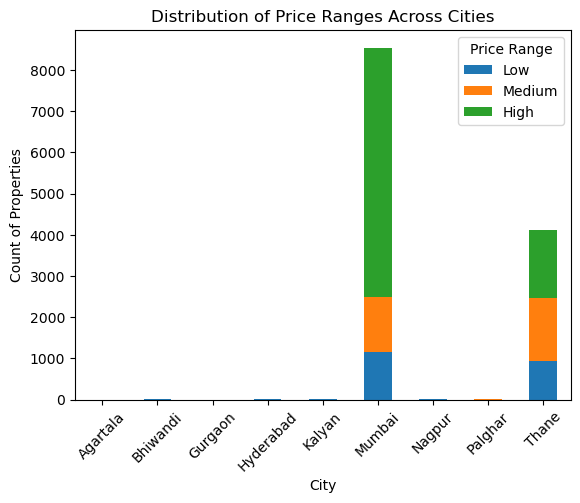

In [97]:
# Creating price range bins for properties
bins = [0, 5000000, 10000000, np.inf]  # Example ranges
labels = ['Low', 'Medium', 'High']
df['Price Range'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Analyzing the distribution of price ranges across cities
price_range_distribution = df.groupby(['City', 'Price Range']).size().unstack().fillna(0)

# Plotting the distribution using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

price_range_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Price Ranges Across Cities')
plt.ylabel('Count of Properties')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

## Q2.

## Price range dimensions.

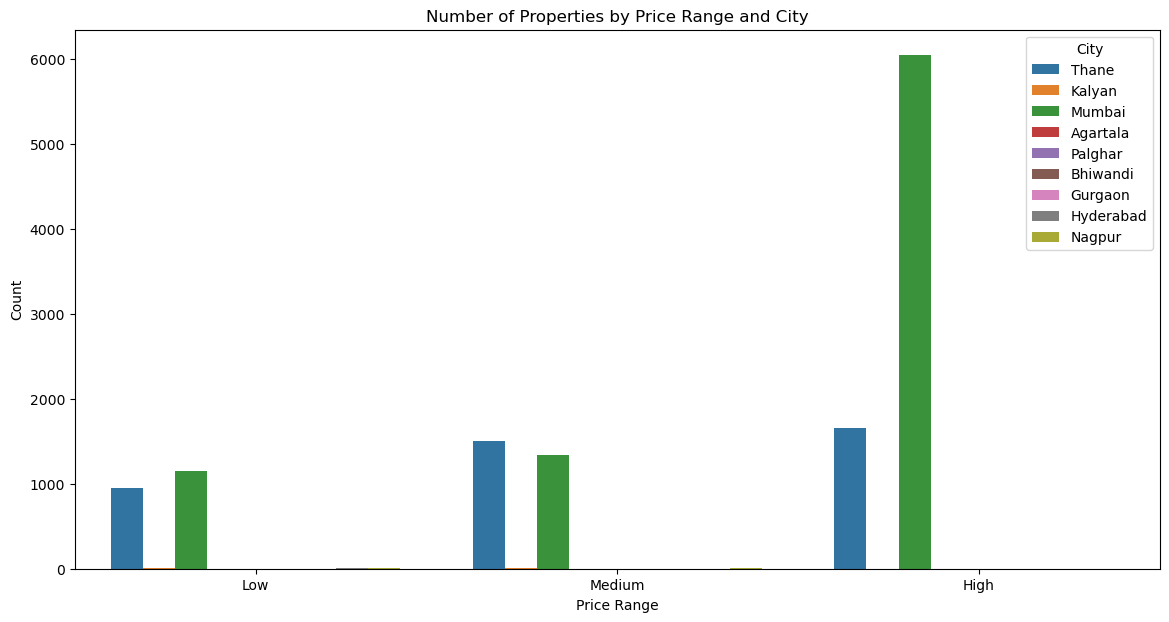

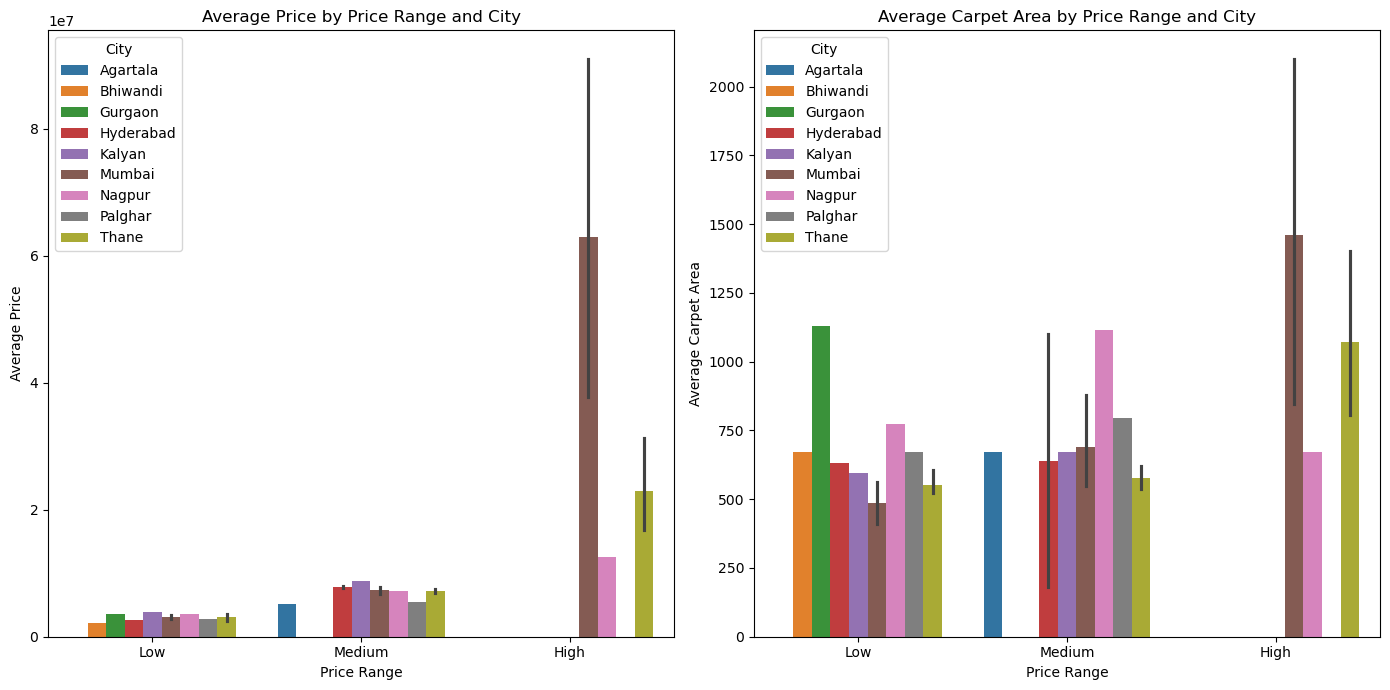

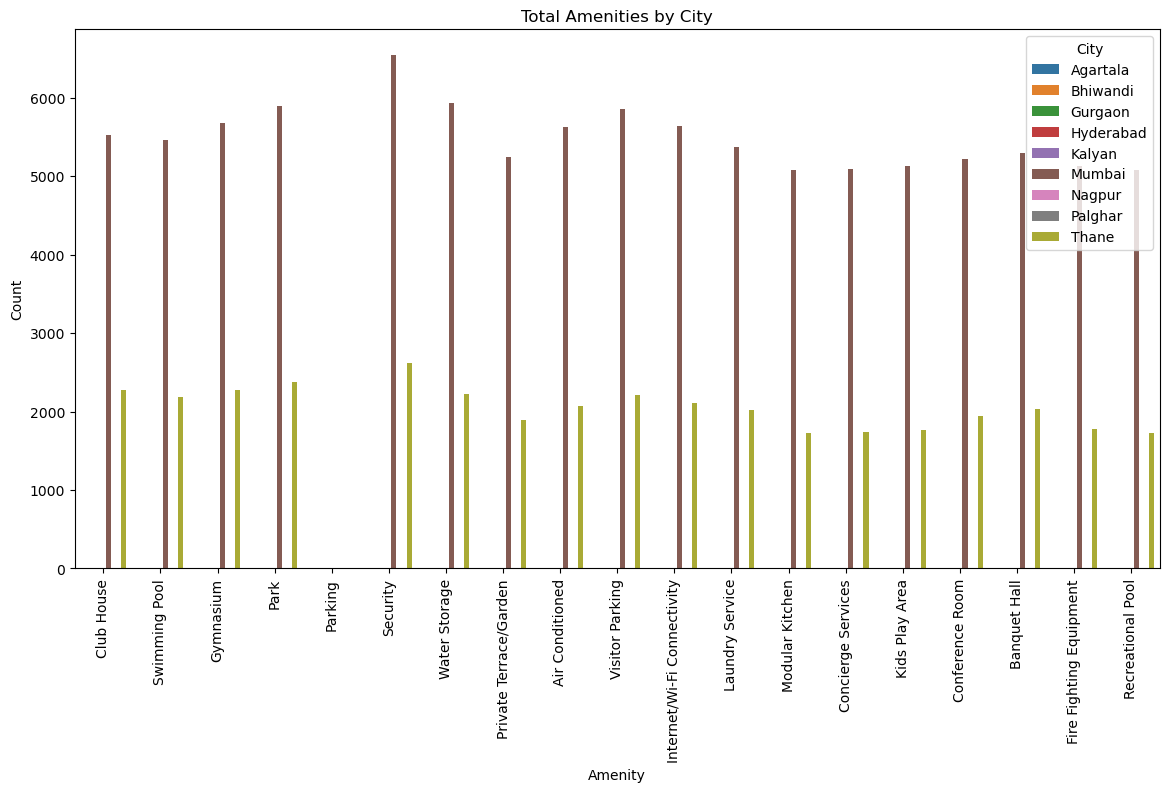

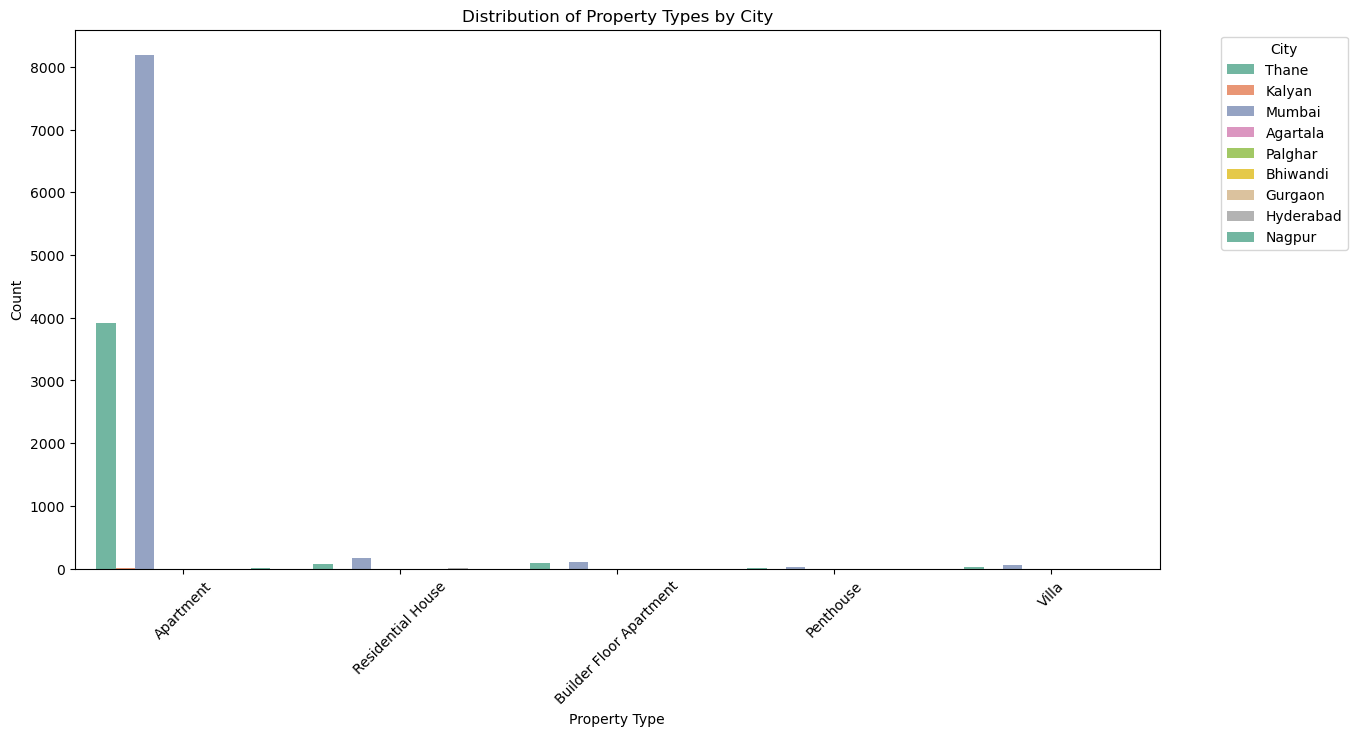

In [103]:
# Define key amenities
amenities = ['Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking', 'Security',
             'Water Storage', 'Private Terrace/Garden', 'Air Conditioned', 'Visitor Parking',
             'Internet/Wi-Fi Connectivity', 'Laundry Service', 'Modular Kitchen',
             'Concierge Services', 'Kids Play Area', 'Conference Room', 'Banquet Hall',
             'Fire Fighting Equipment', 'Recreational Pool']

# Create a summary DataFrame for amenities
summary = df.groupby(['Price Range', 'City', 'Type of Property']).agg({
    'Carpet Area': 'mean',
    'Price': 'mean',
    **{amenity: 'sum' for amenity in amenities}
}).reset_index()

# Convert amenities columns to numeric if they are not already
for amenity in amenities:
    summary[amenity] = pd.to_numeric(summary[amenity], errors='coerce')

# Visualization

# 1. Summary of properties by Price Range and City
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Price Range', hue='City')
plt.title('Number of Properties by Price Range and City')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='City')
plt.show()

# 2. Average Price and Carpet Area by Price Range and City
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(data=summary, x='Price Range', y='Price', hue='City')
plt.title('Average Price by Price Range and City')
plt.xlabel('Price Range')
plt.ylabel('Average Price')

plt.subplot(1, 2, 2)
sns.barplot(data=summary, x='Price Range', y='Carpet Area', hue='City')
plt.title('Average Carpet Area by Price Range and City')
plt.xlabel('Price Range')
plt.ylabel('Average Carpet Area')

plt.tight_layout()
plt.show()

# 3. Total Amenities by City
amenities_summary = summary.groupby('City')[amenities].sum().reset_index()

# Melt the DataFrame for easier plotting
amenities_summary_melted = amenities_summary.melt(id_vars='City', var_name='Amenity', value_name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(data=amenities_summary_melted, x='Amenity', y='Count', hue='City')
plt.title('Total Amenities by City')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 4. Property Type Distribution by City
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Type of Property', hue='City', palette='Set2')
plt.title('Distribution of Property Types by City')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## Q3.

## Investment opportunities in Thane & Mumbai

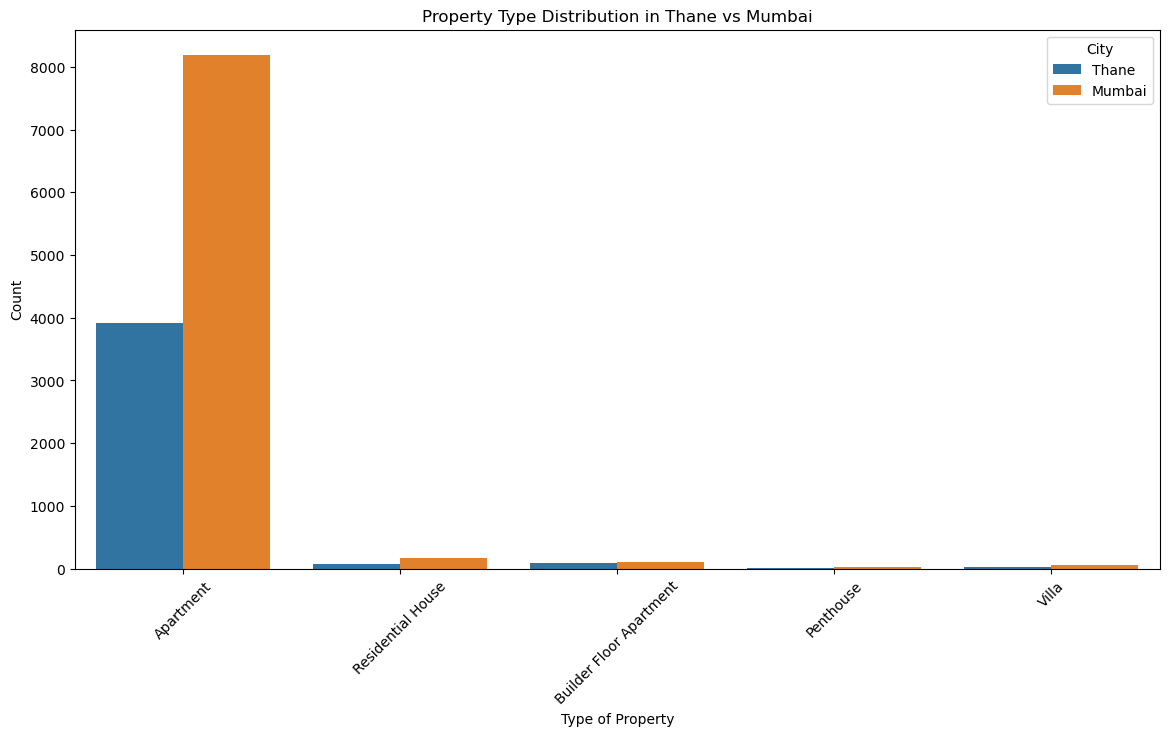

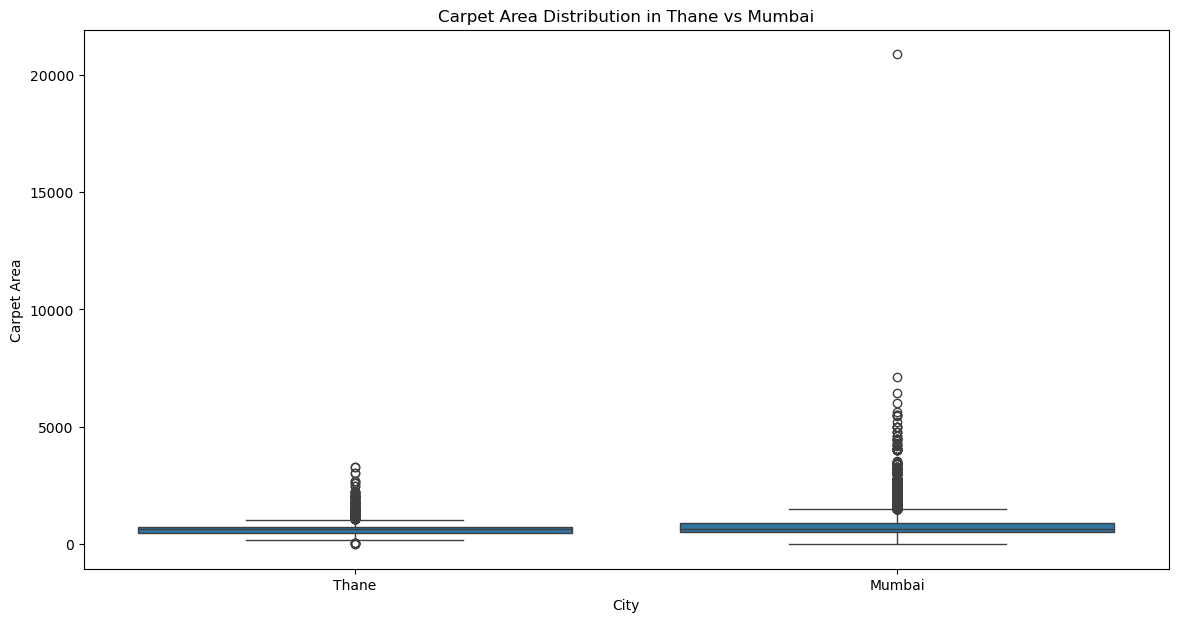

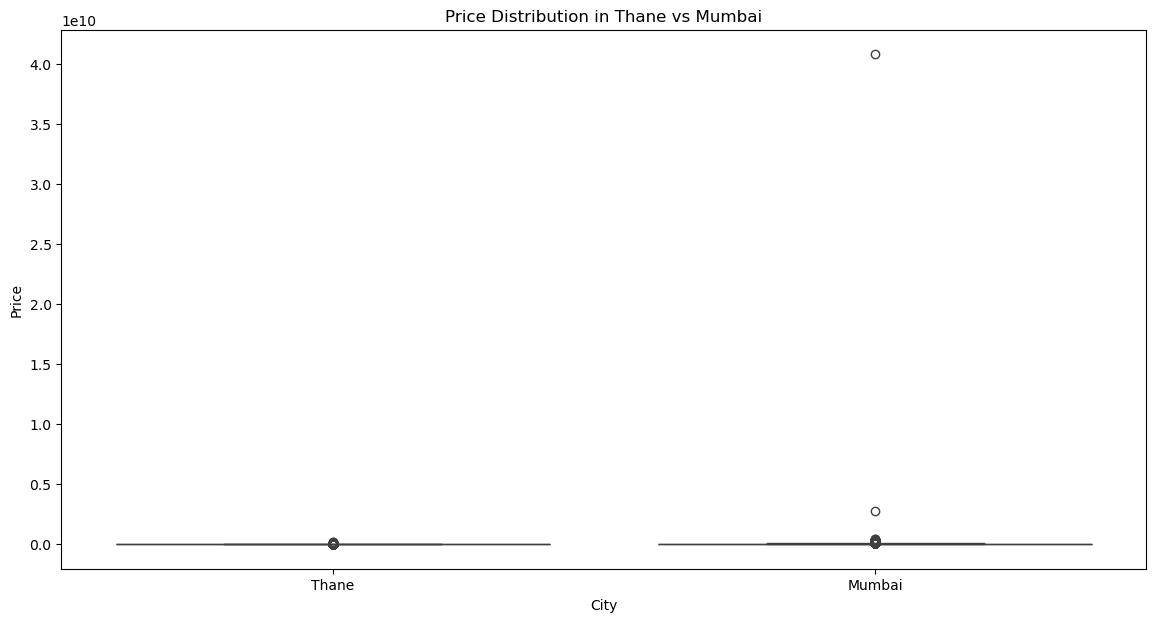

Summary Statistics for Carpet Area and Price by City:
       Carpet Area                            Price                          
              mean median         std          mean      median           std
City                                                                         
Mumbai  841.616717  671.0  603.673097  3.383798e+07  18000000.0  4.435290e+08
Thane   681.417700  671.0  281.465248  1.085382e+07   8500000.0  9.328744e+06


In [109]:
# Data preprocessing
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Type of Property'] = df['Type of Property'].astype(str)

# Filter data for Thane and Mumbai
cities_of_interest = ['Thane', 'Mumbai']
df_filtered = df[df['City'].isin(cities_of_interest)]

# Plot property type distribution
plt.figure(figsize=(14, 7))
sns.countplot(data=df_filtered, x='Type of Property', hue='City')
plt.title('Property Type Distribution in Thane vs Mumbai')
plt.xlabel('Type of Property')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.show()

# Plot Carpet Area distribution
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_filtered, x='City', y='Carpet Area')
plt.title('Carpet Area Distribution in Thane vs Mumbai')
plt.xlabel('City')
plt.ylabel('Carpet Area')
plt.show()

# Plot Price distribution
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_filtered, x='City', y='Price')
plt.title('Price Distribution in Thane vs Mumbai')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

# Calculate and display summary statistics
print("Summary Statistics for Carpet Area and Price by City:")
summary = df_filtered.groupby('City').agg({
    'Carpet Area': ['mean', 'median', 'std'],
    'Price': ['mean', 'median', 'std']
})
print(summary)

## Q4.

## Effect of locality in the investment opportunity discussion.

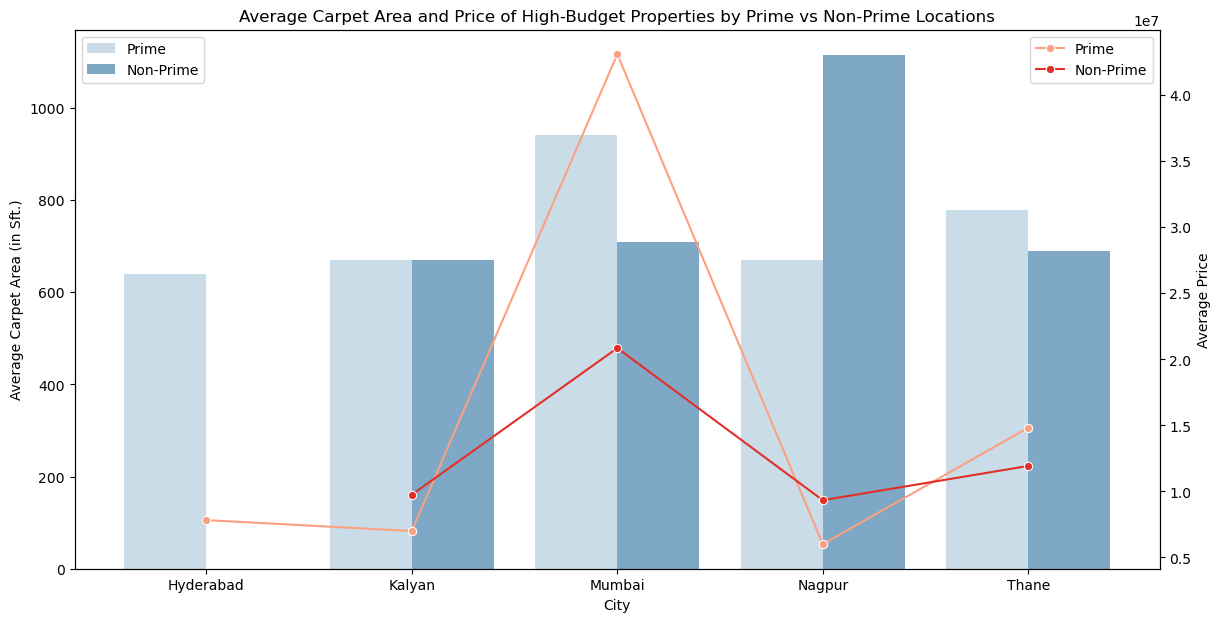

In [129]:
# Data preprocessing
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['isPrimeLocationProperty'] = df['isPrimeLocationProperty'].astype(str)  # Ensure categorical data is in string format

# Define price ranges
def categorize_price(price):
    if price < 3000000:
        return 'Low'
    elif price < 6000000:
        return 'Medium'
    else:
        return 'High'

df['Price Range'] = df['Price'].apply(categorize_price)

# Filter high-budget properties
high_budget_df = df[df['Price Range'] == 'High']

# Calculate average Carpet Area and Price by city and prime location status
summary_stats = high_budget_df.groupby(['City', 'isPrimeLocationProperty'])[['Carpet Area', 'Price']].mean().reset_index()

# Plot the comparison
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot average Carpet Area
sns.barplot(data=summary_stats, x='City', y='Carpet Area', hue='isPrimeLocationProperty', ax=ax1, palette='Blues', alpha=0.7)
ax1.set_title('Average Carpet Area and Price of High-Budget Properties by Prime vs Non-Prime Locations')
ax1.set_xlabel('City')
ax1.set_ylabel('Average Carpet Area (in Sft.)')

# Create a second y-axis for Price
ax2 = ax1.twinx()
sns.lineplot(data=summary_stats, x='City', y='Price', hue='isPrimeLocationProperty', marker='o', ax=ax2, palette='Reds')
ax2.set_ylabel('Average Price')

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Update legend labels
# Map old labels 'Y' and 'N' to new labels
labels1 = [label.replace('Y', 'Prime').replace('N', 'Non-Prime') for label in labels1]
labels2 = [label.replace('Y', 'Prime').replace('N', 'Non-Prime') for label in labels2]

# Place the legends on different sides
ax1.legend(handles1, labels1, loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(handles2, labels2, loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

## Q5.

## Best value for money properties

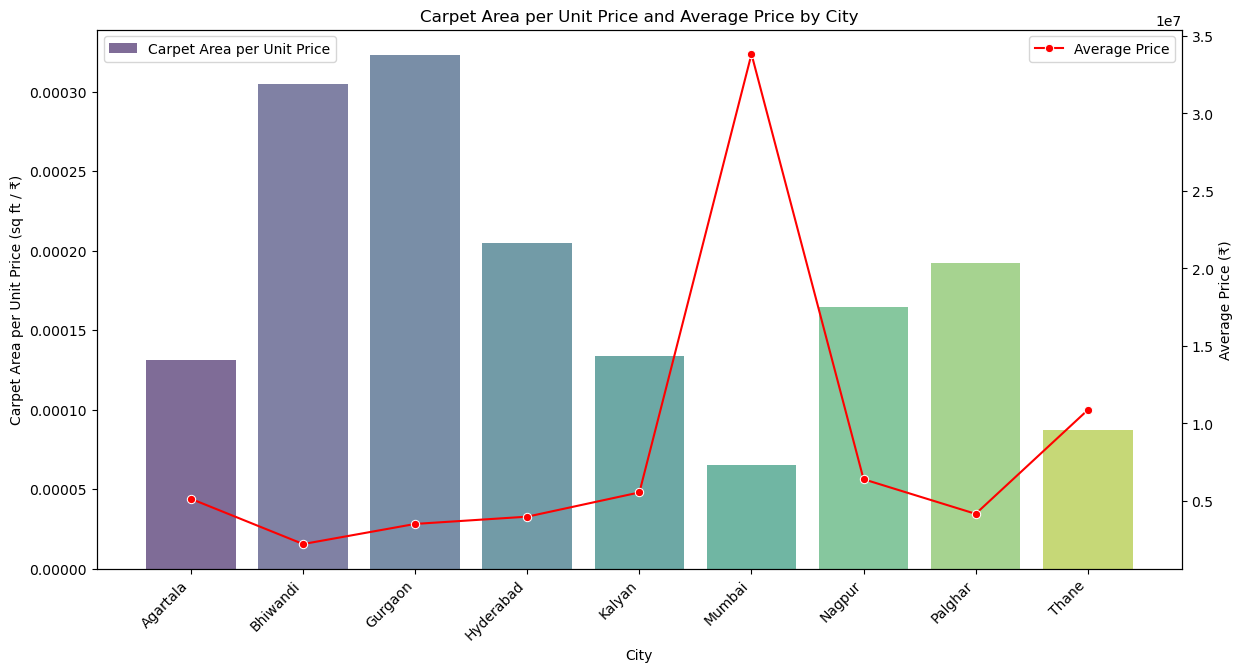

In [143]:
# Data preprocessing
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Calculate Carpet Area per unit of Price
df['Value Ratio'] = df['Carpet Area'] / df['Price']

# Drop rows where 'Value Ratio' is infinite or NaN
df = df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['Value Ratio'])

# Calculate average Carpet Area per unit of Price and Price by city
summary_stats = df.groupby('City').agg({
    'Value Ratio': 'mean',
    'Price': 'mean'
}).reset_index()

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot average Carpet Area per unit of Price
sns.barplot(data=summary_stats, x='City', y='Value Ratio', ax=ax1, palette='viridis', alpha=0.7, label='Carpet Area per Unit Price')
ax1.set_title('Carpet Area per Unit Price and Average Price by City')
ax1.set_xlabel('City')
ax1.set_ylabel('Carpet Area per Unit Price (sq ft / ₹)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a secondary y-axis for Price
ax2 = ax1.twinx()
sns.lineplot(data=summary_stats, x='City', y='Price', marker='o', ax=ax2, color='red', label='Average Price')
ax2.set_ylabel('Average Price (₹)')

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Update legend labels
labels1 = ['Carpet Area per Unit Price']
labels2 = ['Average Price']

# Place the legends on different sides
ax1.legend(handles1, labels1, loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(handles2, labels2, loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

# Q6.

## Commercial Hotspots in Mumbai and Thane

     City         Price                            Carpet Area         \
                   mean      median           std         mean median   
0  Mumbai  3.989490e+07  24000000.0  4.653230e+07  1001.844496  732.0   
1   Thane  1.198722e+07   8800000.0  1.096409e+07   685.059278  650.0   

               
          std  
0  745.818219  
1  344.876204  


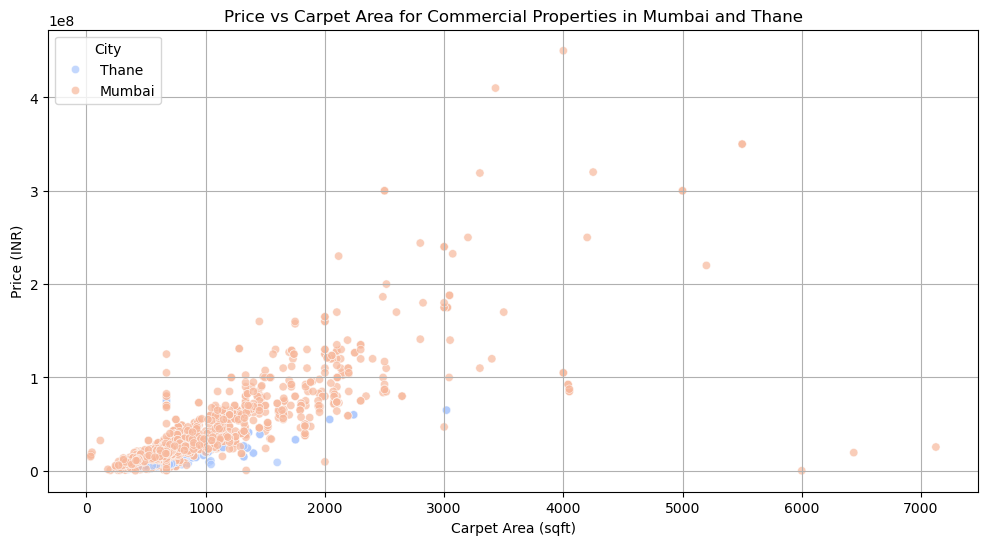

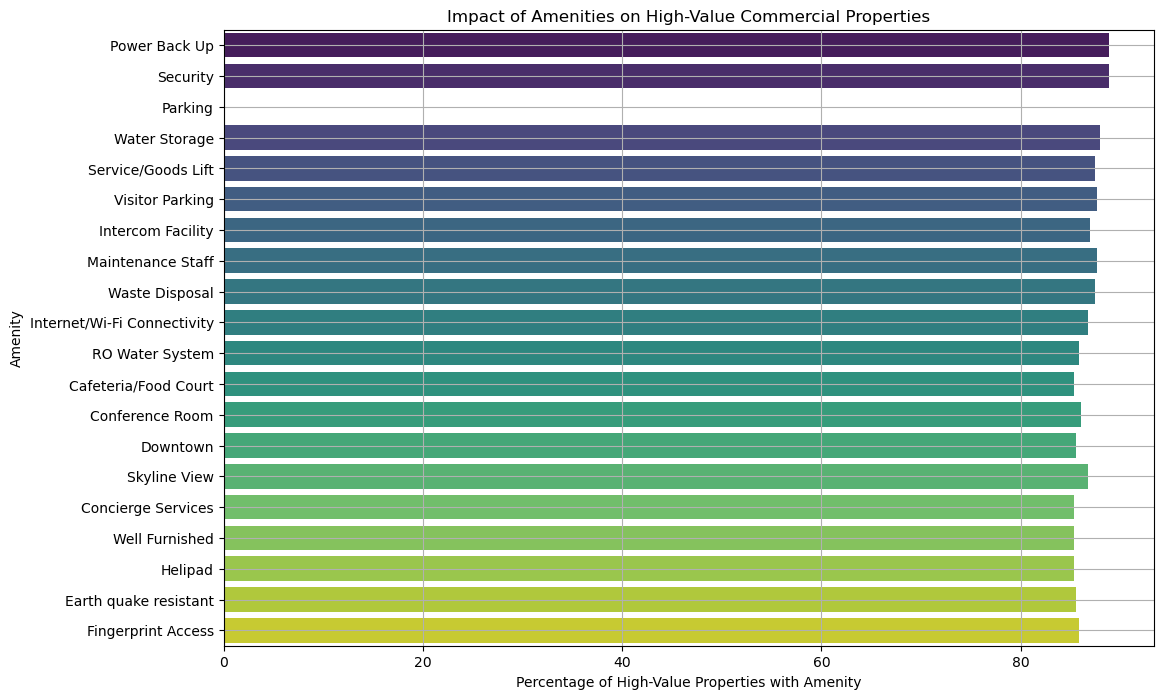

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


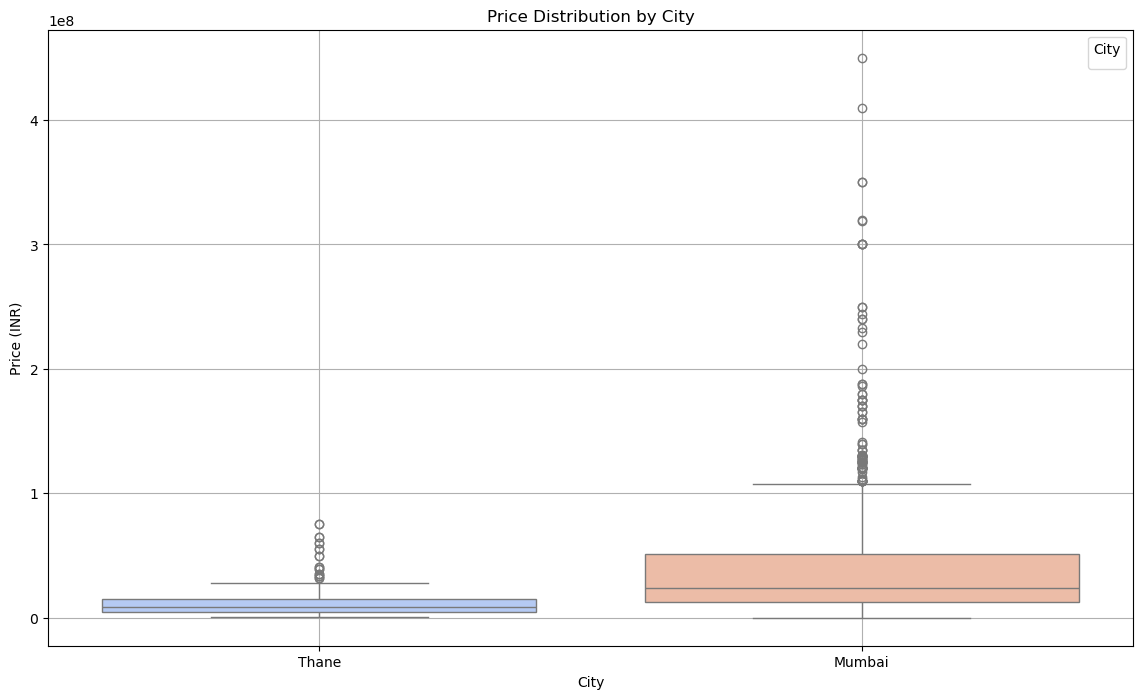

                            Location         Price
121               RTO Colony, Mumbai  1.600000e+08
95              Marine Drive, Mumbai  1.416667e+08
86   Mahalaxmi Sindhi Colony, Mumbai  1.400000e+08
118               Prabhadevi, Mumbai  1.369640e+08
70                Khar Danda, Mumbai  1.350000e+08
..                               ...           ...
108          Nalasopara East, Mumbai  3.084200e+06
1          Aarey Milk Colony, Mumbai  2.900000e+06
109          Nalasopara West, Mumbai  2.671429e+06
152              Vasant Vihar, Thane  2.200000e+06
157               Virar East, Mumbai  1.981364e+06

[165 rows x 2 columns]


In [157]:
# Filter for commercial properties in Mumbai and Thane
df_filtered = df[(df['City'].isin(['Mumbai', 'Thane'])) & (df['Commercial'] == 'Y')]

# Check if the filtered DataFrame is empty
if df_filtered.empty:
    print("No commercial properties found for Mumbai and Thane.")
else:
    # Summary statistics for Price and Carpet Area
    summary_stats = df_filtered.groupby('City').agg({
        'Price': ['mean', 'median', 'std'],
        'Carpet Area': ['mean', 'median', 'std']
    }).reset_index()
    
    print(summary_stats)

    # Plot Price vs Carpet Area
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_filtered, x='Carpet Area', y='Price', hue='City', palette='coolwarm', alpha=0.7)
    plt.title('Price vs Carpet Area for Commercial Properties in Mumbai and Thane')
    plt.xlabel('Carpet Area (sqft)')
    plt.ylabel('Price (INR)')
    plt.legend(title='City', loc='upper left')
    plt.grid(True)
    plt.show()

    # Analyze amenities in high-value areas
    high_value_threshold = df_filtered['Price'].quantile(0.75)  # Define high-value threshold
    df_high_value = df_filtered[df_filtered['Price'] >= high_value_threshold]

    if df_high_value.empty:
        print("No high-value properties found.")
    else:
        # List of amenities to analyze (with selected amenities removed)
        amenities = [
            'Power Back Up', 'Security', 'Parking', 'Water Storage', 
            'Service/Goods Lift', 'Visitor Parking', 'Intercom Facility', 
            'Maintenance Staff', 'Waste Disposal', 'Internet/Wi-Fi Connectivity', 
            'RO Water System', 'Cafeteria/Food Court', 'Conference Room', 
            'Downtown', 'Skyline View', 'Concierge Services', 
            'Well Furnished', 'Helipad', 'Earth quake resistant', 'Fingerprint Access'
        ]

        # Calculate the percentage of properties with each amenity in high-value areas
        amenity_impact = {}
        for amenity in amenities:
            if amenity in df_high_value.columns:
                count_with_amenity = df_high_value[df_high_value[amenity] == 1].shape[0]
                total_count = df_high_value.shape[0]
                if total_count > 0:
                    percentage = (count_with_amenity / total_count) * 100
                    amenity_impact[amenity] = percentage

        # Convert results to DataFrame
        df_amenity_impact = pd.DataFrame(list(amenity_impact.items()), columns=['Amenity', 'Percentage'])

        # Plot amenities impact
        plt.figure(figsize=(12, 8))
        sns.barplot(data=df_amenity_impact, x='Percentage', y='Amenity', palette='viridis')
        plt.title('Impact of Amenities on High-Value Commercial Properties')
        plt.xlabel('Percentage of High-Value Properties with Amenity')
        plt.ylabel('Amenity')
        plt.grid(True)
        plt.show()

    # Location-based analysis
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_filtered, x='City', y='Price', hue='City', palette='coolwarm')
    plt.title('Price Distribution by City')
    plt.xlabel('City')
    plt.ylabel('Price (INR)')
    plt.legend(title='City', loc='upper right')
    plt.grid(True)
    plt.show()

    # Average price by location
    avg_price_by_location = df_filtered.groupby('Location').agg({'Price': 'mean'}).reset_index()
    avg_price_by_location = avg_price_by_location.sort_values(by='Price', ascending=False)

    print(avg_price_by_location)

## Q7.

## Impact of Amenities on property prices in Mumbai and Thane.

<Figure size 1400x800 with 0 Axes>

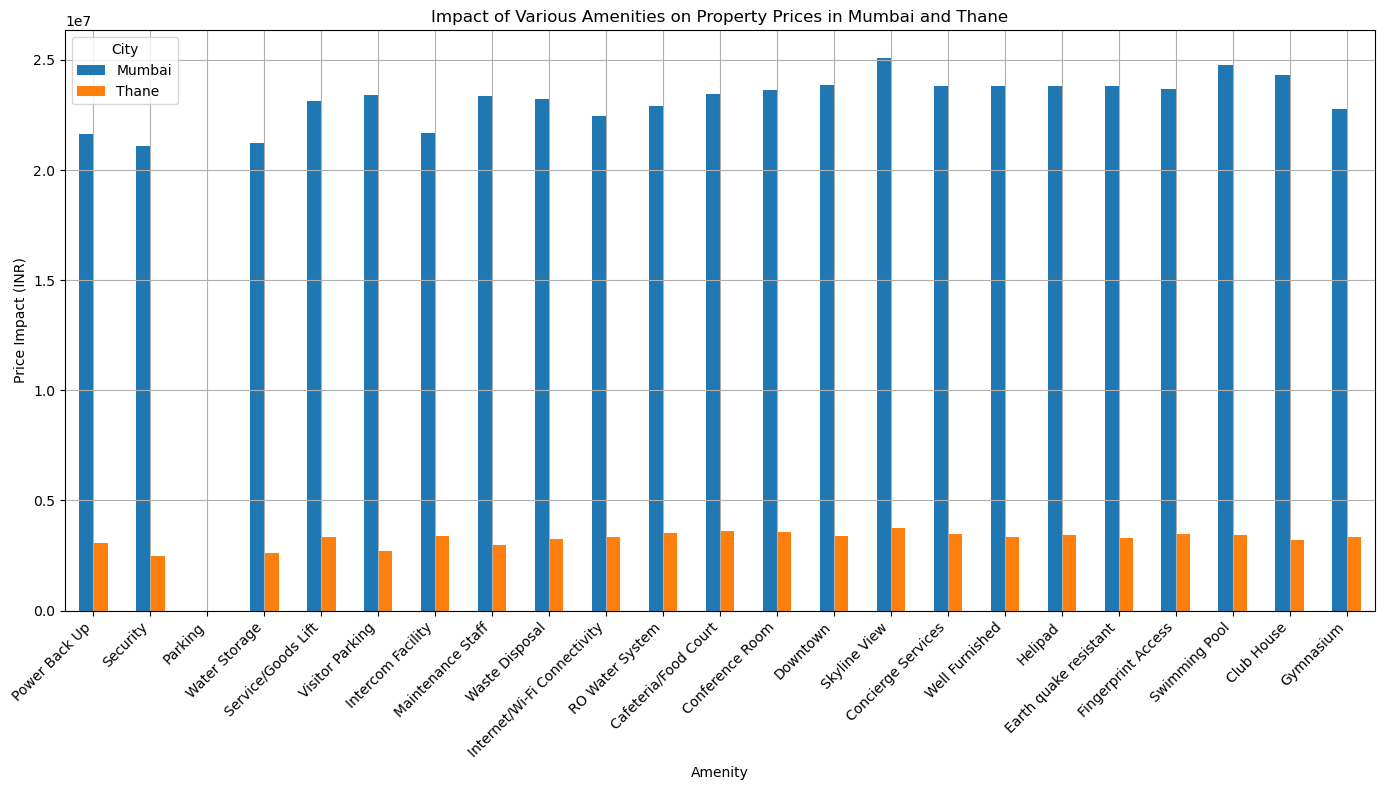

Amenity: Power Back Up
  Mumbai: 68.25%
  Thane: 56.92%

Amenity: Security
  Mumbai: 76.57%
  Thane: 63.53%

Amenity: Parking
  Mumbai: 0.00%
  Thane: 0.00%

Amenity: Water Storage
  Mumbai: 69.50%
  Thane: 54.12%

Amenity: Service/Goods Lift
  Mumbai: 64.77%
  Thane: 50.06%

Amenity: Visitor Parking
  Mumbai: 68.61%
  Thane: 53.71%

Amenity: Intercom Facility
  Mumbai: 68.11%
  Thane: 53.71%

Amenity: Maintenance Staff
  Mumbai: 69.69%
  Thane: 54.58%

Amenity: Waste Disposal
  Mumbai: 67.76%
  Thane: 53.83%

Amenity: Internet/Wi-Fi Connectivity
  Mumbai: 65.99%
  Thane: 51.37%

Amenity: RO Water System
  Mumbai: 63.31%
  Thane: 46.56%

Amenity: Cafeteria/Food Court
  Mumbai: 60.55%
  Thane: 46.49%

Amenity: Conference Room
  Mumbai: 61.10%
  Thane: 47.14%

Amenity: Downtown
  Mumbai: 59.53%
  Thane: 42.23%

Amenity: Skyline View
  Mumbai: 59.73%
  Thane: 42.52%

Amenity: Concierge Services
  Mumbai: 59.52%
  Thane: 42.18%

Amenity: Well Furnished
  Mumbai: 59.39%
  Thane: 41.87%

Ame

In [165]:
# Filter for Mumbai and Thane
df_filtered = df[df['City'].isin(['Mumbai', 'Thane'])]

# List of amenities to analyze
amenities = [
    'Power Back Up', 'Security', 'Parking', 'Water Storage', 
    'Service/Goods Lift', 'Visitor Parking', 'Intercom Facility', 
    'Maintenance Staff', 'Waste Disposal', 'Internet/Wi-Fi Connectivity', 
    'RO Water System', 'Cafeteria/Food Court', 'Conference Room', 
    'Downtown', 'Skyline View', 'Concierge Services', 'Well Furnished', 
    'Helipad', 'Earth quake resistant', 'Fingerprint Access',
    'Swimming Pool', 'Club House', 'Gymnasium'
]

# Ensure amenities columns are numeric
for amenity in amenities:
    if amenity in df_filtered.columns:
        df_filtered[amenity] = pd.to_numeric(df_filtered[amenity], errors='coerce')

# Function to calculate the average price impact for each amenity
def calculate_amenity_impact(df, amenity):
    df_with_amenity = df[df[amenity] == 1]
    avg_price_with_amenity = df_with_amenity.groupby('City')['Price'].mean()
    avg_price_without_amenity = df[df[amenity] == 0].groupby('City')['Price'].mean()
    impact = avg_price_with_amenity - avg_price_without_amenity
    return impact

# Calculate impact for each amenity
impact_dict = {}
for amenity in amenities:
    if amenity in df_filtered.columns:
        impact = calculate_amenity_impact(df_filtered, amenity)
        impact_dict[amenity] = impact

# Convert to DataFrame for plotting
df_impact = pd.DataFrame(impact_dict).T
df_impact.columns = ['Mumbai', 'Thane']
df_impact = df_impact.reset_index().rename(columns={'index': 'Amenity'})

# Plot impact of amenities on property prices
plt.figure(figsize=(14, 8))
ax = df_impact.set_index('Amenity').plot(kind='bar', figsize=(14, 8))
plt.title('Impact of Various Amenities on Property Prices in Mumbai and Thane')
plt.xlabel('Amenity')
plt.ylabel('Price Impact (INR)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare amenity preferences between the two cities
for amenity in amenities:
    if amenity in df_filtered.columns:
        amenity_count_mumbai = df_filtered[df_filtered['City'] == 'Mumbai'][amenity].sum()
        amenity_count_thane = df_filtered[df_filtered['City'] == 'Thane'][amenity].sum()
        total_mumbai = df_filtered[df_filtered['City'] == 'Mumbai'].shape[0]
        total_thane = df_filtered[df_filtered['City'] == 'Thane'].shape[0]
        
        # Ensure counts are numeric and handle division by zero
        amenity_count_mumbai = pd.to_numeric(amenity_count_mumbai, errors='coerce')
        amenity_count_thane = pd.to_numeric(amenity_count_thane, errors='coerce')
        total_mumbai = pd.to_numeric(total_mumbai, errors='coerce')
        total_thane = pd.to_numeric(total_thane, errors='coerce')
        
        if total_mumbai > 0:
            percentage_mumbai = (amenity_count_mumbai / total_mumbai) * 100
        else:
            percentage_mumbai = 0
        
        if total_thane > 0:
            percentage_thane = (amenity_count_thane / total_thane) * 100
        else:
            percentage_thane = 0
        
        print(f"Amenity: {amenity}")
        print(f"  Mumbai: {percentage_mumbai:.2f}%")
        print(f"  Thane: {percentage_thane:.2f}%\n")

## Q8.

## Effect of Possession Status and Availability Dates on Property Prices in Mumbai & Thane. Significance of Ready-to-move-in vs. under-construction status of buying decisions.

<Figure size 1200x800 with 0 Axes>

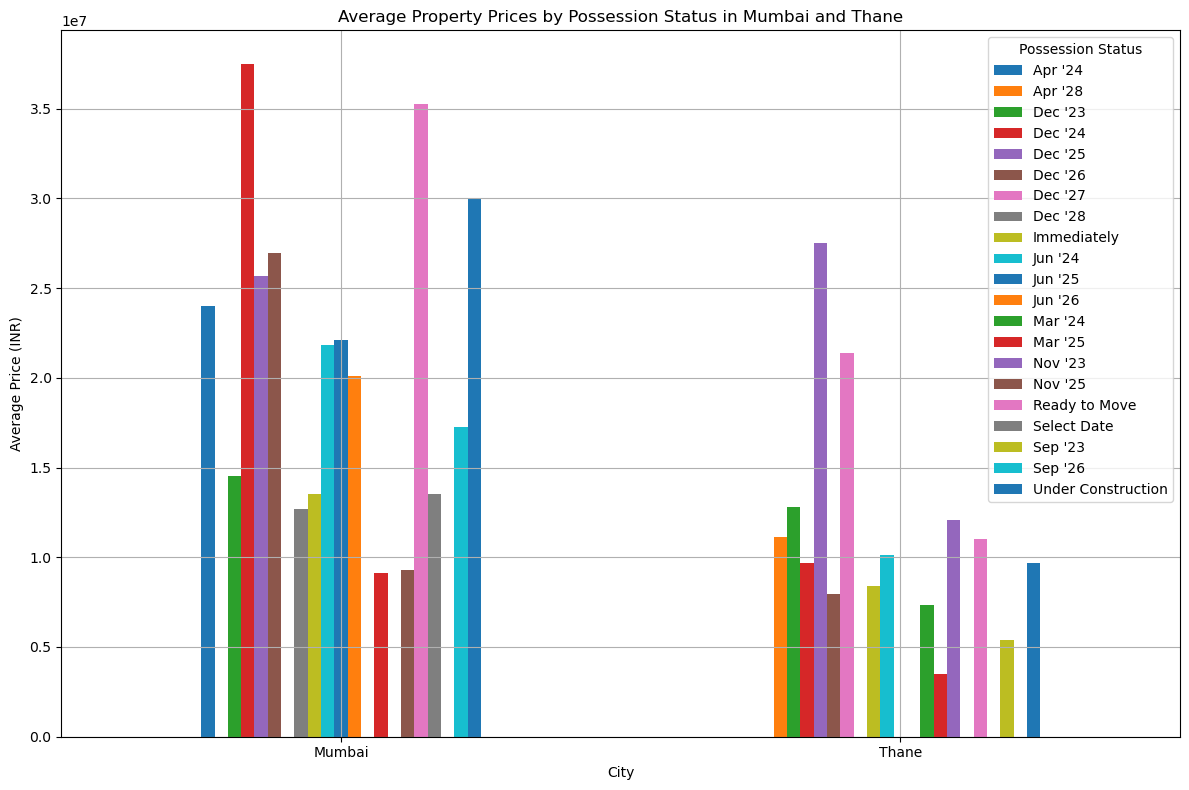

DataFrame content for price_by_availability:
Availability Year        2012       2014       2015       2016        2017  \
City                                                                         
Mumbai                    NaN  8500000.0  4475000.0  5000000.0  31242750.0   
Thane              11000000.0  4000000.0        NaN  7695000.0   1211250.0   

Availability Year       2018          2019        2020          2021  \
City                                                                   
Mumbai             5204800.0  2.902857e+07  20650000.0  1.825223e+07   
Thane              3127000.0  1.280000e+07   5930000.0  1.098889e+07   

Availability Year          2022          2023          2024          2025  \
City                                                                        
Mumbai             3.375202e+07  3.257019e+07  2.562339e+07  3.433369e+07   
Thane              1.574171e+07  1.104177e+07  8.563660e+06  1.086854e+07   

Availability Year          2026          202

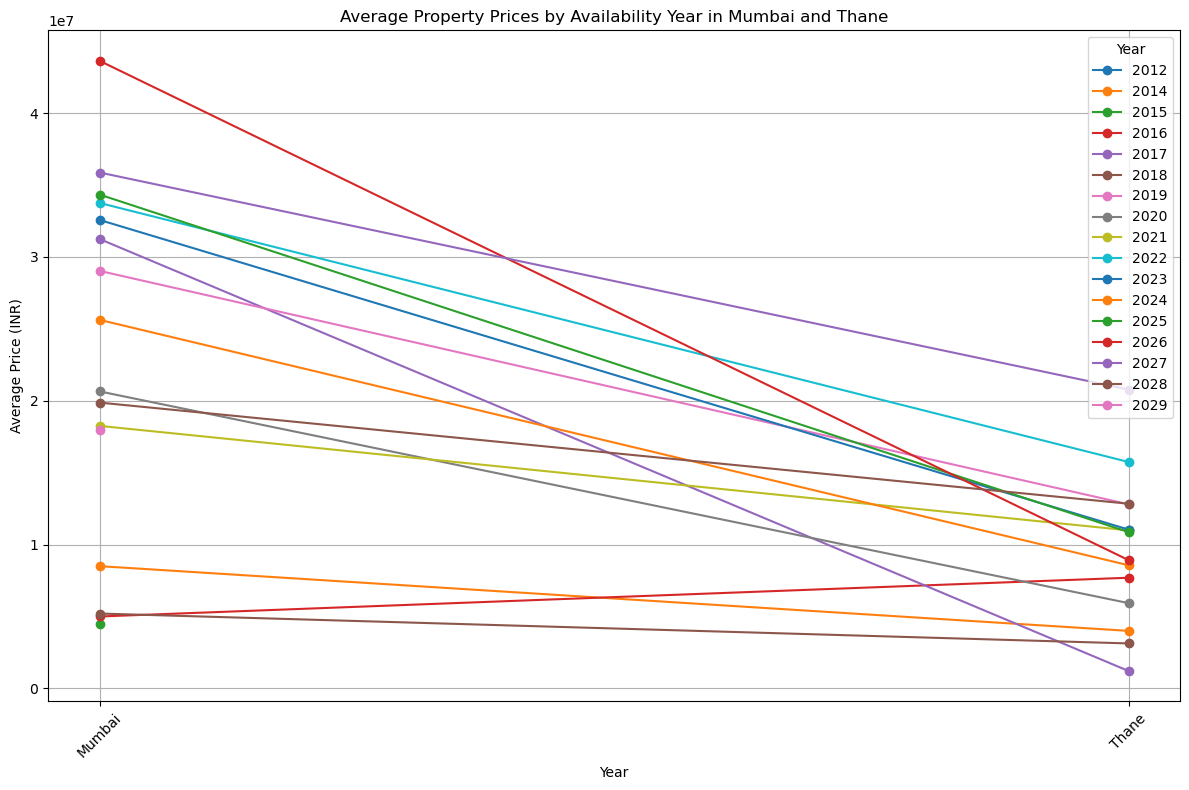

Price Statistics by Possession Status:
                            count          mean           std         min  \
City   Possession Status                                                    
Mumbai Apr '24                3.0  2.400000e+07  8.660254e+05  23000000.0   
       Dec '23               12.0  1.454542e+07  8.348029e+06   4435000.0   
       Dec '24               19.0  3.748947e+07  3.687900e+07   6900000.0   
       Dec '25               16.0  2.569116e+07  7.769688e+06  11000000.0   
       Dec '26               29.0  2.697303e+07  2.501858e+07   8195000.0   
       Dec '28               12.0  1.271667e+07  2.882181e+06   9500000.0   
       Immediately            2.0  1.350000e+07  0.000000e+00  13500000.0   
       Jun '24                9.0  2.184333e+07  1.228077e+07   7990000.0   
       Jun '25                3.0  2.210000e+07  2.251666e+06  20800000.0   
       Jun '26               16.0  2.010256e+07  1.070875e+07   6941000.0   
       Mar '25                3.0  9.

In [175]:
# Convert 'Availability Starts From' to datetime
df['Availability Starts From'] = pd.to_datetime(df['Availability Starts From'], errors='coerce')

# Filter for Mumbai and Thane
df_filtered = df[df['City'].isin(['Mumbai', 'Thane'])]

# Convert 'Possession Status' to categorical
df_filtered['Possession Status'] = df_filtered['Possession Status'].astype('category')

# Group by Possession Status and City to calculate average price
price_by_status = df_filtered.groupby(['City', 'Possession Status'])['Price'].mean().unstack()

# Plot price differences by possession status
plt.figure(figsize=(12, 8))
price_by_status.plot(kind='bar', figsize=(12, 8))
plt.title('Average Property Prices by Possession Status in Mumbai and Thane')
plt.xlabel('City')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=0)
plt.legend(title='Possession Status')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze the effect of 'Availability Starts From' on prices
# Create a new column for availability year
df_filtered['Availability Year'] = df_filtered['Availability Starts From'].dt.year

# Group by 'Availability Year' and City to calculate average price
price_by_availability = df_filtered.groupby(['City', 'Availability Year'])['Price'].mean().unstack()

# Debug: Print the DataFrame to check for numeric data
print("DataFrame content for price_by_availability:")
print(price_by_availability.head())
print("\nDataFrame dtypes for price_by_availability:")
print(price_by_availability.dtypes)

# Ensure all columns are numeric
price_by_availability = price_by_availability.apply(pd.to_numeric, errors='coerce')

# Check for any columns with non-numeric data
non_numeric_columns = price_by_availability.select_dtypes(exclude=['number']).columns
if not non_numeric_columns.empty:
    print(f"Non-numeric columns found: {non_numeric_columns}")
else:
    print("All columns are numeric.")

# Plot price differences by availability year if data is numeric
if not price_by_availability.empty and price_by_availability.select_dtypes(include=['number']).notna().any().any():
    plt.figure(figsize=(12, 8))
    for city in price_by_availability.columns:
        plt.plot(price_by_availability.index, price_by_availability[city], marker='o', label=city)
    plt.title('Average Property Prices by Availability Year in Mumbai and Thane')
    plt.xlabel('Year')
    plt.ylabel('Average Price (INR)')
    plt.xticks(rotation=45)
    plt.legend(title='Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric data available for plotting.")

# Print detailed price statistics for possession status
print("Price Statistics by Possession Status:")
print(df_filtered.groupby(['City', 'Possession Status'])['Price'].describe())

# Print average price differences
print("\nAverage Price Differences by Possession Status:")
print(price_by_status)

## Q9.

## Influence of Developers on property prices.

Columns in the dataset:
Index(['ID', 'Possession Status', 'Availability Starts From', 'Floor No',
       'Commercial', 'Developer', 'Approved Authority Name', 'Units Available',
       'Price', 'Price (English)',
       ...
       'Fire Fighting Equipment', 'Aesthetically designed landscape garden',
       'Possession By', 'NRI Pref', 'Land Area / Covered Area',
       'Land Area Unit', 'Pantry Type', 'Match', 'Price Range', 'Value Ratio'],
      dtype='object', length=147)


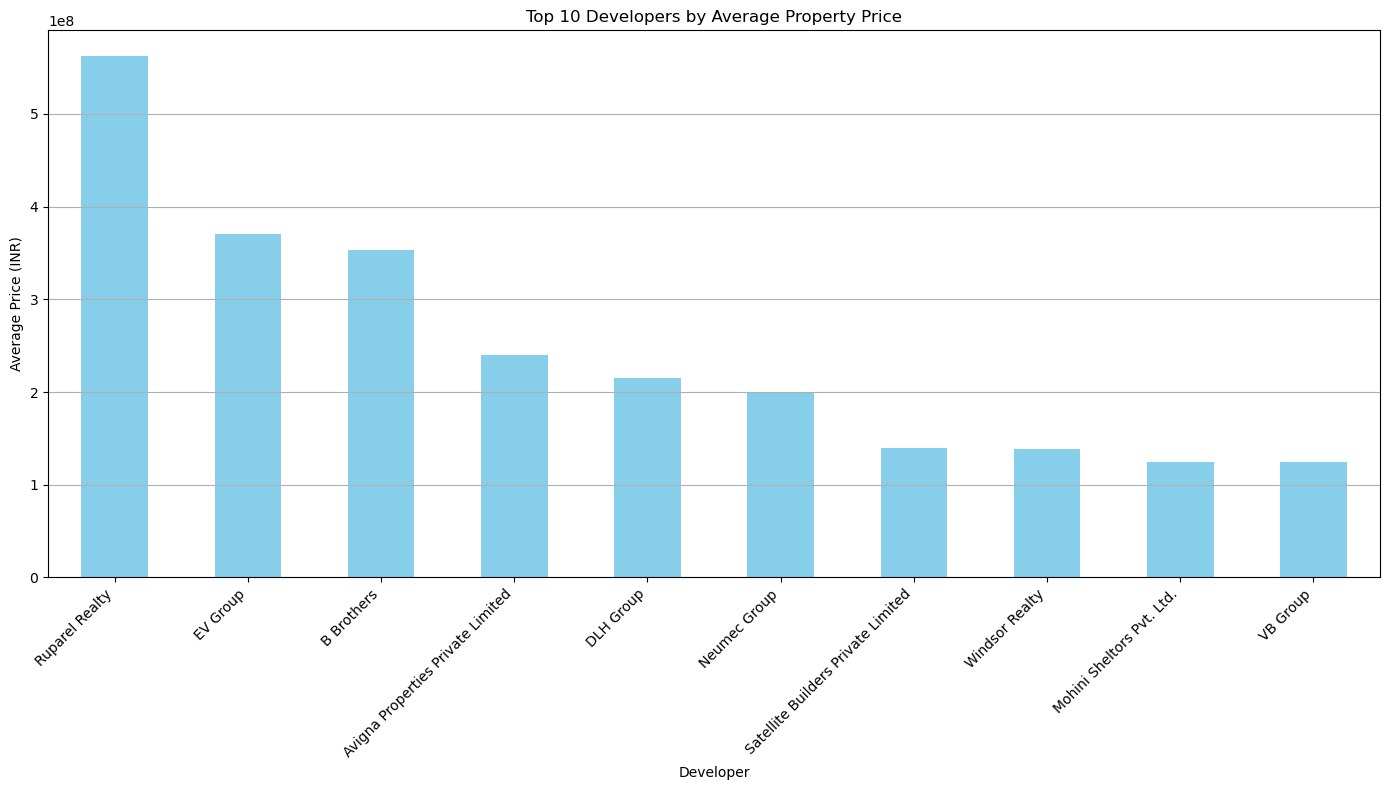

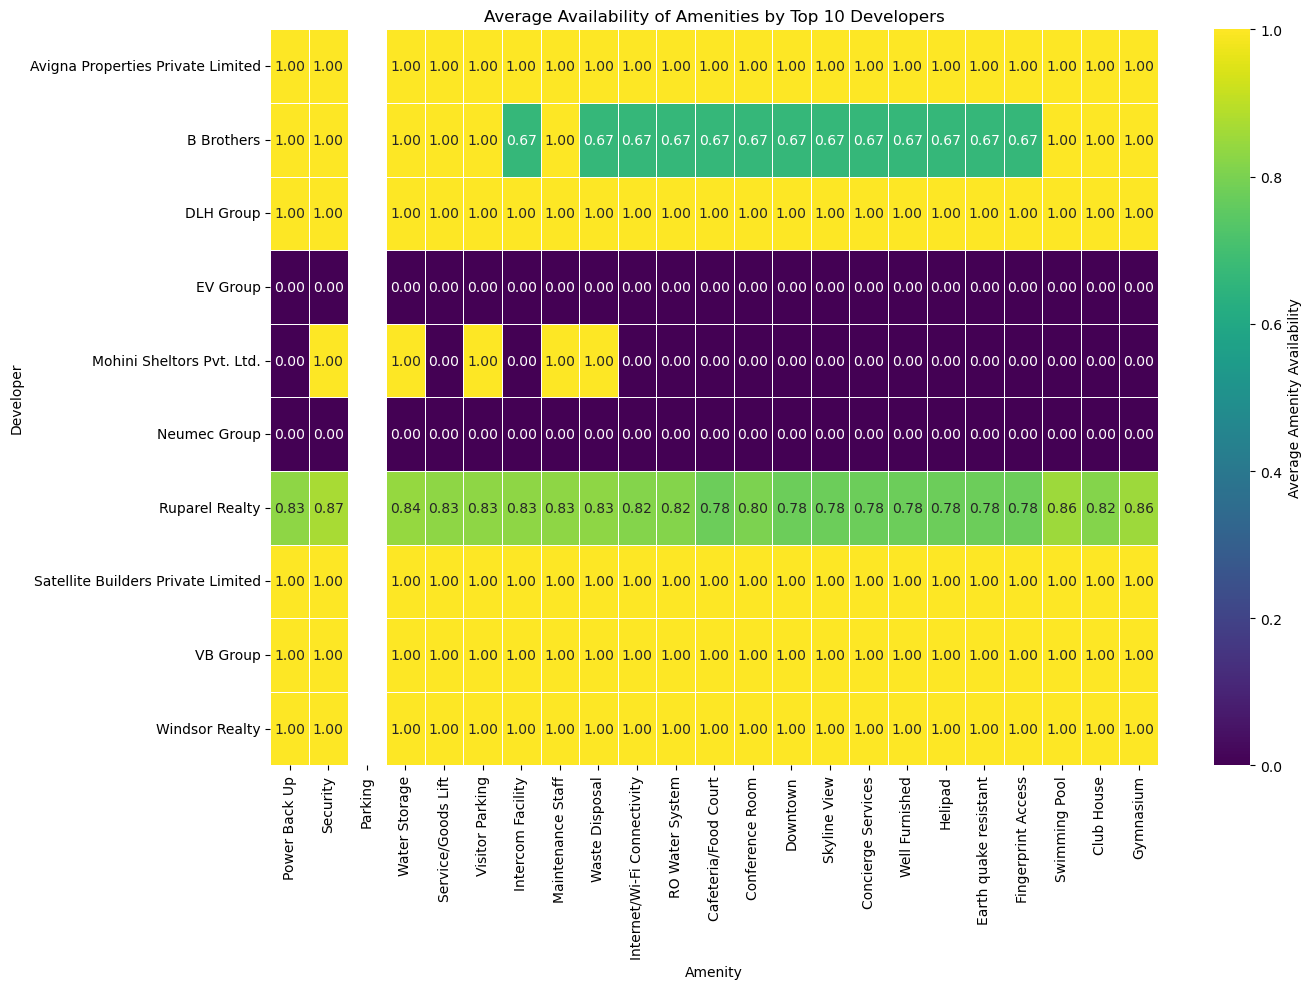

Correlation between average price and average amenities: -0.11

Average Amenities by Developer:
       Power Back Up   Security  Parking  Water Storage  Service/Goods Lift  \
count      10.000000  10.000000      0.0      10.000000           10.000000   
mean        0.682895   0.786842      NaN       0.784211            0.682895   
std         0.474190   0.416727      NaN       0.416237            0.474190   
min         0.000000   0.000000      NaN       0.000000            0.000000   
25%         0.207237   0.901316      NaN       0.881579            0.207237   
50%         1.000000   1.000000      NaN       1.000000            1.000000   
75%         1.000000   1.000000      NaN       1.000000            1.000000   
max         1.000000   1.000000      NaN       1.000000            1.000000   

       Visitor Parking  Intercom Facility  Maintenance Staff  Waste Disposal  \
count        10.000000          10.000000          10.000000       10.000000   
mean          0.782895          

In [181]:
# Check for columns related to developers and amenities
print("Columns in the dataset:")
print(df.columns)

# Convert 'Price' to numeric, if necessary
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with missing 'Developer' or 'Price' data
df_clean = df.dropna(subset=['Developer', 'Price'])

# Analyze the average price by developer
price_by_developer = df_clean.groupby('Developer')['Price'].mean().sort_values(ascending=False)

# Get top 10 developers based on average price
top_10_developers = price_by_developer.head(10).index
df_top10 = df_clean[df_clean['Developer'].isin(top_10_developers)]

# Plot average property prices by developer
plt.figure(figsize=(14, 8))
price_by_developer.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Developers by Average Property Price')
plt.xlabel('Developer')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Define list of key amenities including Swimming Pool, Club House, and Gymnasium
amenities = [
    'Power Back Up', 'Security', 'Parking', 'Water Storage',
    'Service/Goods Lift', 'Visitor Parking', 'Intercom Facility',
    'Maintenance Staff', 'Waste Disposal', 'Internet/Wi-Fi Connectivity',
    'RO Water System', 'Cafeteria/Food Court', 'Conference Room',
    'Downtown', 'Skyline View', 'Concierge Services', 'Well Furnished',
    'Helipad', 'Earth quake resistant', 'Fingerprint Access',
    'Swimming Pool', 'Club House', 'Gymnasium'
]

# Convert amenity columns to numeric
for amenity in amenities:
    if amenity in df_top10.columns:
        df_top10[amenity] = pd.to_numeric(df_top10[amenity], errors='coerce')

# Group by developer to calculate the average availability of amenities
amenity_availability = df_top10.groupby('Developer')[amenities].mean()

# Plot average availability of amenities by developer
plt.figure(figsize=(14, 10))
sns.heatmap(amenity_availability, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Average Amenity Availability'})
plt.title('Average Availability of Amenities by Top 10 Developers')
plt.xlabel('Amenity')
plt.ylabel('Developer')
plt.tight_layout()
plt.show()

# Optional: Analyze if developers associated with higher prices offer more amenities
# Calculate correlation between average price and average amenities
price_amenities = pd.concat([price_by_developer.head(10), amenity_availability.mean(axis=1)], axis=1)
price_amenities.columns = ['Average Price', 'Average Amenities']
correlation = price_amenities.corr().iloc[0, 1]

print(f"Correlation between average price and average amenities: {correlation:.2f}")

# Print detailed statistics for amenities by developer
print("\nAverage Amenities by Developer:")
print(amenity_availability.describe())